In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score


#Load dataset using Pandas
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [347]:
# Remove rows with missing values
df.dropna(inplace=True)

In [348]:
# Check for null values again after cleanup
print("Null values after cleanup:")
print(df.isnull().sum())

Null values after cleanup:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [349]:
#show number of rolls and detail of dataframe
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

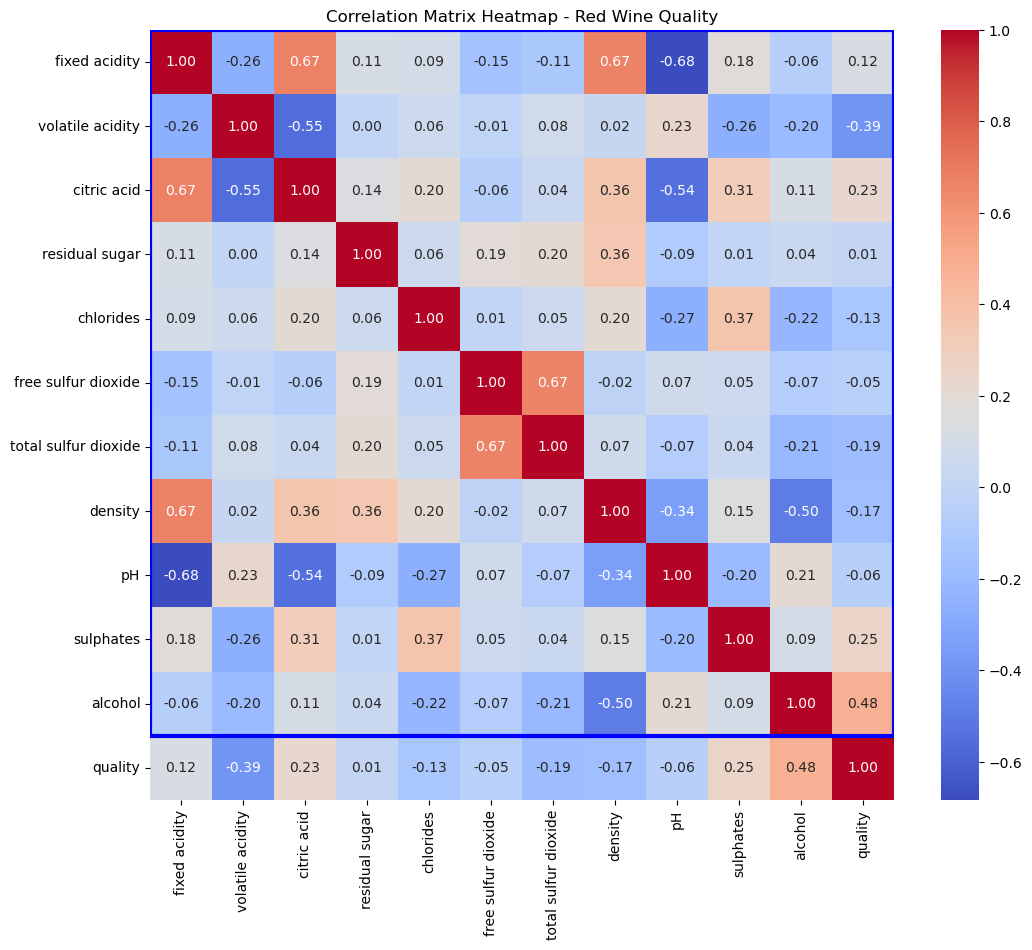

In [350]:
# Compute the correlation matrix - Developer PMA
# Calculate correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix Heatmap - Red Wine Quality')

# Highlight correlations with 'Potability'
highlight = correlation_matrix['quality'].sort_values(ascending=False)
highlight = highlight.drop('quality')  # Remove self-correlation
highlight_cols = highlight.index.tolist()
heatmap.add_patch(plt.Rectangle((0, 0), len(correlation_matrix), len(highlight_cols), fill=False, edgecolor='blue', lw=3))

# Show plot
plt.show()

In [351]:
# Separate features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

In [352]:
# Normalize or scale the features if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [353]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [354]:
# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=50)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=50)

In [355]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [356]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.72


In [357]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importance (Random Forest):")
print(importance_df)

Feature Importance (Random Forest):
                 Feature  Importance
10               alcohol    0.150609
9              sulphates    0.115033
1       volatile acidity    0.102129
6   total sulfur dioxide    0.101270
7                density    0.091951
0          fixed acidity    0.080192
4              chlorides    0.079843
8                     pH    0.076647
2            citric acid    0.070201
3         residual sugar    0.067891
5    free sulfur dioxide    0.064234


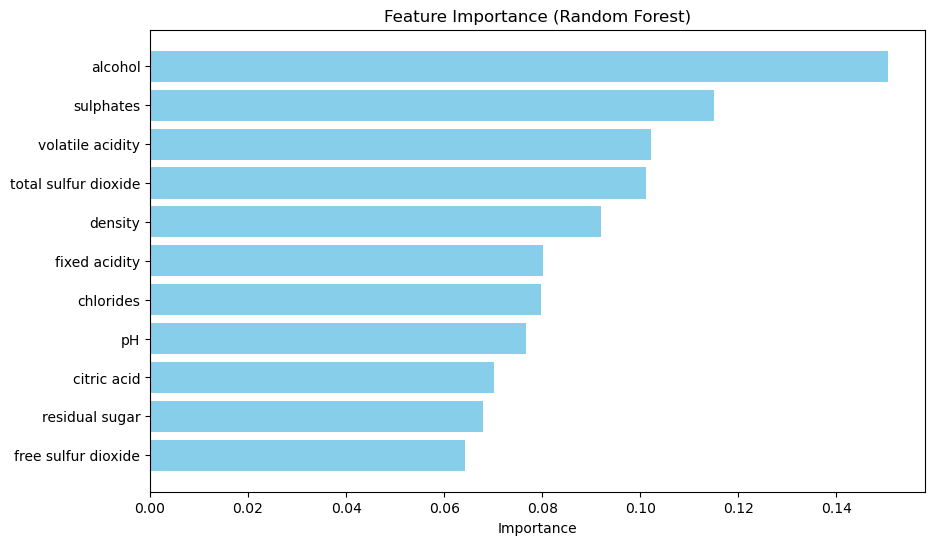

In [358]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the most important at the top
plt.show()

In [359]:
X = data.drop(['free sulfur dioxide', 'residual sugar', 'quality'], axis=1)
y = data['quality']

In [360]:
# Categorize 'quality' into bins
# Treat wine quality >= 6 as 'good' (1) and < 6 as 'not good' (0)
threshold = 6
y_binary = (y >= threshold).astype(int)  # 1 for good, 0 for not good

# Check the balance of the newly defined binary classes in 'y_binary'
class_balance_binary = y_binary.value_counts(normalize=True)

print(class_balance_binary)

quality
1    0.534709
0    0.465291
Name: proportion, dtype: float64


In [363]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.7500
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       141
           1       0.80      0.73      0.77       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.76      0.75      0.75       320



In [364]:
# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7375
              precision    recall  f1-score   support

           0       0.69      0.72      0.71       141
           1       0.77      0.75      0.76       179

    accuracy                           0.74       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.74      0.74      0.74       320



In [365]:
# Hyperparameter Tuning for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'), param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='f1')

In [366]:
# Best parameters and re-evaluation
print(f"Best Parameters: {grid_search.best_params_}")
best_tree_clf = grid_search.best_estimator_
y_pred_best_tree = best_tree_clf.predict(X_test)
print("Optimized Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_best_tree))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       141
           1       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



In [367]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']  # For handling class imbalance
}

In [368]:
# Initialize the model
rf = RandomForestClassifier(random_state=42)

In [369]:
# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)


In [370]:
# Fit Grid Search to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [371]:
# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8203089231660442
